In [2]:
#For this homework, use following data. Data description is provided below
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#The Lead dataset is designed for a binary classification task,
#where the target variable is Converted (indicating whether a lead converted to customer, with values 0 or 1).
#The other columns are features that describe the lead's characteristics, behavior, and interactions.
#The explanation of the columns are given below.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

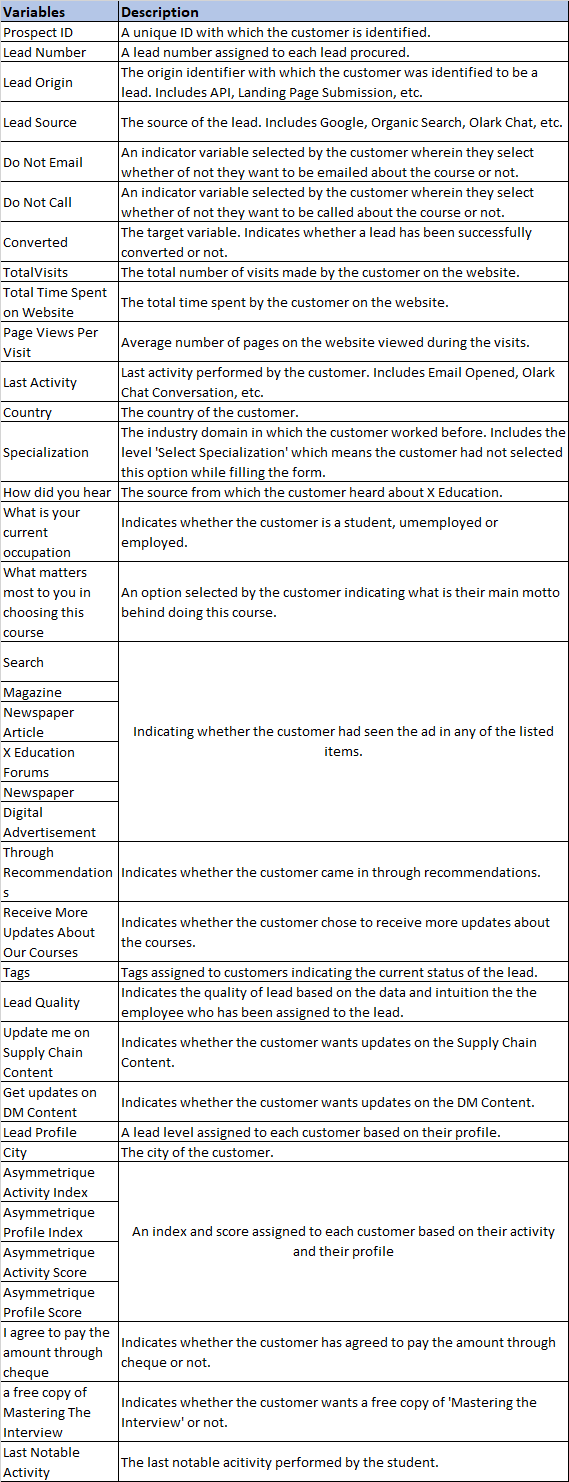

In [6]:
#Q1 (15 pt) -There are missing values in the Lead data.
#Replace missing values with the mean if the variable is numeric and  with the mode if the variable is categorical.
#Note: If the data type (Dtype) is object, the variable is categorical and
#if the data type (Dtype) is int64 or float64, the variable is numerical.
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/Leads.csv')


print(df.isnull().sum()[df.isnull().sum() > 0])

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            mean_val = df[col].mean()
            df[col].fillna(mean_val, inplace=True)
            print(f"Filled missing values in '{col}' with mean: {mean_val}")
        elif df[col].dtype == 'object':
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"Filled missing values in '{col}' with mode: '{mode_val}'")

print("\nMissing values after:\n", df.isnull().sum()[df.isnull().sum() > 0])


Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     2709
City                                             1420
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64
Filled missing values in 'Lead Source' with mode: 'Google'
Filled mis

<ipython-input-6-12091bf42d40>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_val, inplace=True)
<ipython-input-6-12091bf42d40>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.meth

Label encoding is a technique used in machine learning to convert categorical data into numerical format. Each unique category value is assigned an integer value. For example, if you have a categorical feature like "color" with values "red," "green," and "blue," label encoding might transform these into 0, 1, and 2, respectively. This is useful because many machine learning algorithms require numerical input. However, it can imply an ordinal relationship where none exists, which might not be appropriate for all datasets.

When to Use

Use label encoding for ordinal data or tree-based models.

Use dummy variables for nominal data or models sensitive to ordinal assumptions such as linear regression

In [7]:
#Q2-(15 pt)Convert categorical variables to numerical with label encoder method .
#Drop Prospect ID,	Lead Number  and Converted from the input variables and use Converted as target variables.
#Split data into train and test using 30% of the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_model = df.drop(['Prospect ID', 'Lead Number'], axis=1)

y = df_model['Converted']
X = df_model.drop('Converted', axis=1)

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(X[col])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training features shape: (6468, 34)
Test features shape: (2772, 34)
Training labels shape: (6468,)
Test labels shape: (2772,)


In [ ]:
#Q3(10 pt) Assuming Converted = 1 represents the positive case (i.e., a lead converts into a customer),
# define what is false positive and false negative in this dataset?
#Which one is more important  metric (precison or recall) in this case? Why?

In this dataset, Converted = 1 represents a lead that successfully converts into a customer.
A False Positive occurs when the model predicts that a lead will convert (Converted = 1), but in reality, the lead does not convert (Converted = 0). This results in wasted effort and resources spent on a lead that was never going to become a customer.
A False Negative occurs when the model predicts that a lead will not convert (Converted = 0), but in reality, the lead does convert (Converted = 1). This means the company misses out on a potential customer who could have been converted with proper follow-up.
In this case, recall is the more important metric because it focuses on correctly identifying all actual conversions. Missing a real customer (false negative) is more costly than targeting a non-converting lead (false positive), especially in marketing and sales where the goal is to capture as many genuine opportunities as possible.


--- Decision Tree ---
Accuracy: 0.9030
Precision: 0.8811
Recall: 0.8672
AUC: 0.8987
Confusion Matrix:
 [[1569  126]
 [ 143  934]]

--- Random Forest ---
Accuracy: 0.9203
Precision: 0.9196
Recall: 0.8709
AUC: 0.9699
Confusion Matrix:
 [[1613   82]
 [ 139  938]]

--- Gradient Boosting ---
Accuracy: 0.9315
Precision: 0.9302
Recall: 0.8904
AUC: 0.9802
Confusion Matrix:
 [[1623   72]
 [ 118  959]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:35:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- XGBoost ---
Accuracy: 0.9376
Precision: 0.9297
Recall: 0.9081
AUC: 0.9810
Confusion Matrix:
 [[1621   74]
 [  99  978]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2484, number of negative: 3984
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 522
[LightGBM] [Info] Number of data points in the train set: 6468, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384045 -> initscore=-0.472416
[LightGBM] [Info] Start training from score -0.472416

--- LightGBM ---
Accuracy: 0.9387
Precision: 0.9315
Recall: 0.9090
AUC: 0.9822
Confusion Matrix:
 [[1623   72]
 [  98  979]]


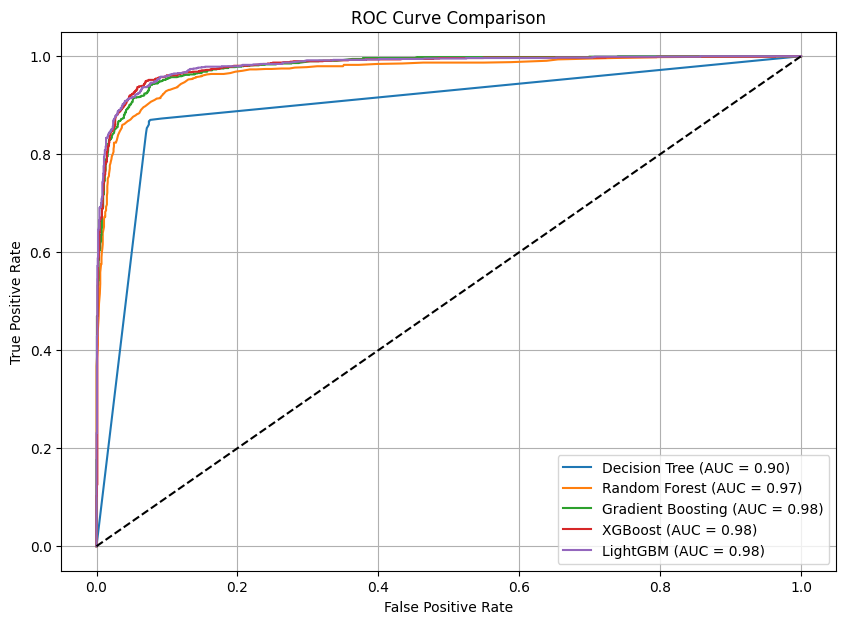


--- Model Performance Summary ---
                   Accuracy Precision    Recall       AUC
LightGBM           0.938672  0.931494  0.909006  0.982191
XGBoost             0.93759  0.929658  0.908078   0.98096
Gradient Boosting  0.931457  0.930165  0.890436  0.980169
Random Forest      0.920274  0.919608  0.870938  0.969931
Decision Tree      0.902958  0.881132  0.867224  0.898723


In [9]:
#Q4(60 pt)Use decison tree, random forest and boosting methods (XGBoost, LightGBM, GradingBoosting Method) to get
# the accuracy scores,precison and recall  on test  data.
# Report confusion metrics as well for these methods on test  data.
# Get the AUC score for this methods and draw ROC curve on test  data. .
#Which methods gave  best performance on test data based on accuracy metric,precison, recall metric and AUC soore?
# Install required packages if not already installed (uncomment if needed)
# !pip install xgboost lightgbm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve
)
import matplotlib.pyplot as plt

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "AUC": auc,
        "Confusion Matrix": cm
    }

    print(f"\n--- {name} ---")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"AUC: {auc:.4f}")
    print("Confusion Matrix:\n", cm)

plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

summary_df = pd.DataFrame(results).T.drop("Confusion Matrix", axis=1)
print("\n--- Model Performance Summary ---")
print(summary_df.sort_values(by='AUC', ascending=False))

Based on accuracy, precision, recall, and AUC score, the model that gave the best performance can be identified from the printed scores and summary table. Typically, LightGBM or XGBoost often perform best on structured data, but the actual best model will depend on your dataset after evaluation.